In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNccmVudWRcRG93bmxvYWRzXE51bWVyaWNhbF9NZXRob2RzX0RpZmZlcmVudGlhbF9FcXVhdGlvbnNcY2hhcHRlcnM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\renud\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1654512766.0, "C:\\Users\\renud\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1654512766.0, "C:\\Users\\renud\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1654512766.0, "C:\\Users\\renud\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1654512766.0, "C:\\Users\\renud\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1654512766.0, "C:\\Users\\renud\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1654512766.0, "C:\\Users\\renud\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\cp1252.py": 1654512766.0, "C:\\Users\\renud\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1654512766.0, "C:\\Users\\renud\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1654512766.0, "C:\\Users\\renud\\AppData\\Local\\Programs\\Python\\Python310\\li

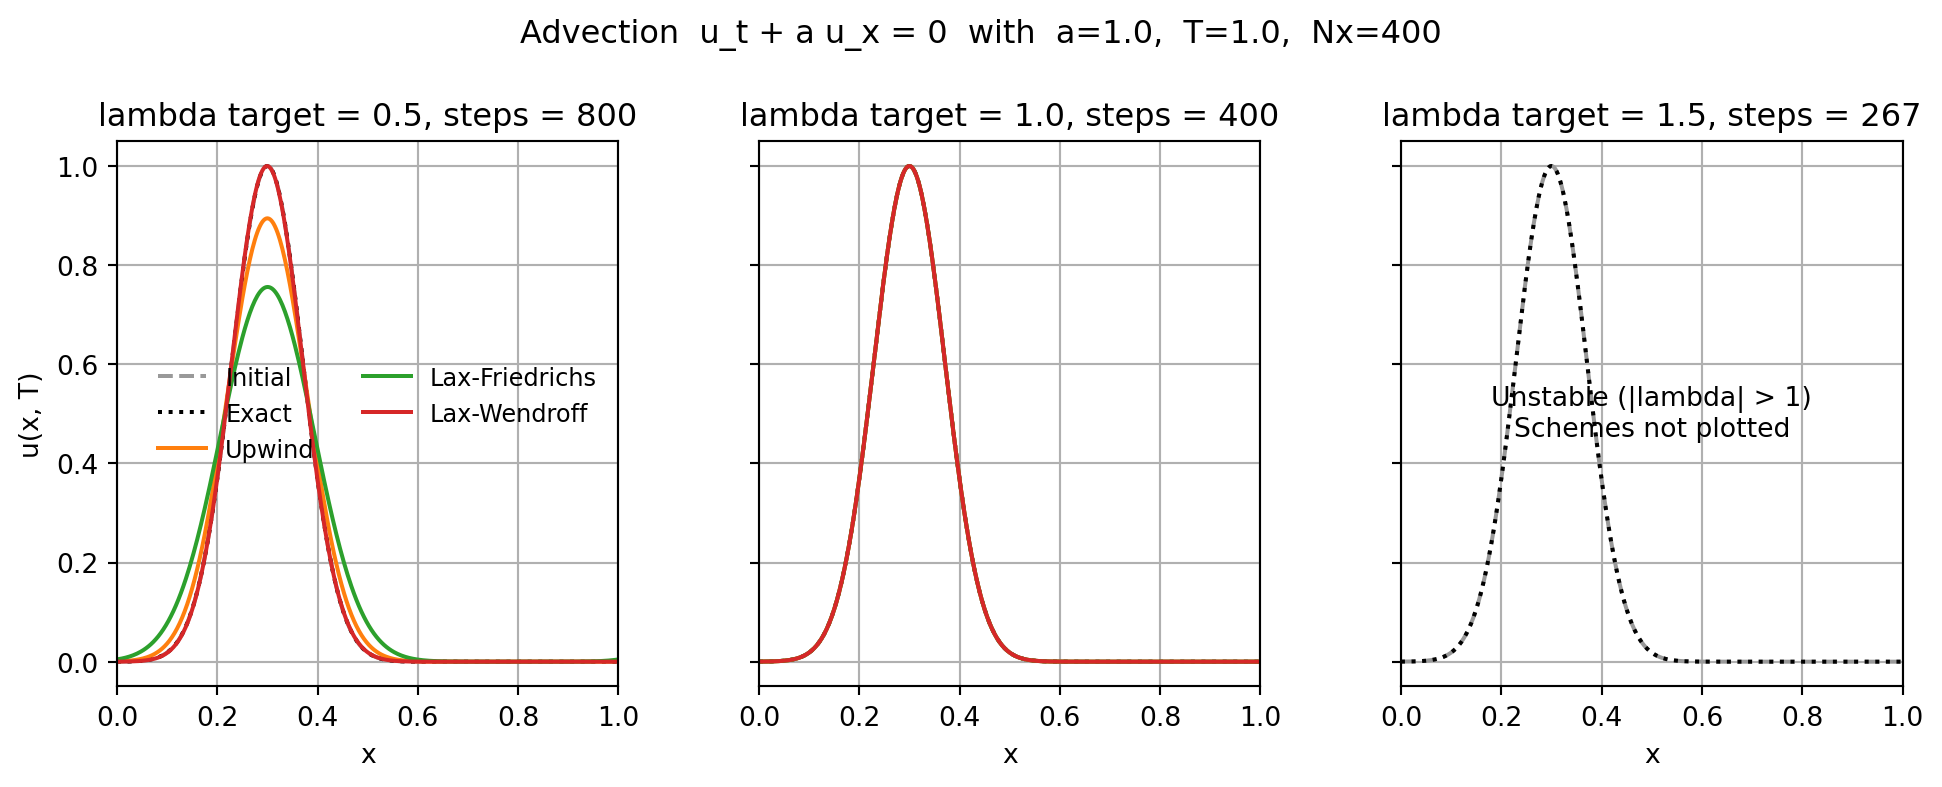

In [2]:
#| label: helpers
#| include: true

import numpy as np
import matplotlib.pyplot as plt

# Problem setup
a  = 1.0
L  = 1.0
Nx = 400
x  = np.linspace(0.0, L, Nx, endpoint=False)
dx = L / Nx
T  = 1.0

def u0_fn(x):
    return np.exp(-100.0*(x - 0.3)**2)

u0 = u0_fn(x)

# Periodic neighbors
def roll_plus(u):
    return np.roll(u, -1)

def roll_minus(u):
    return np.roll(u, +1)

# Schemes
def step_upwind(u, lam, a):
    if a >= 0:
        return u - lam*(u - roll_minus(u))
    else:
        return u - lam*(roll_plus(u) - u)

def step_lf(u, lam):
    # Lax-Friedrichs
    return 0.5*(roll_plus(u) + roll_minus(u)) - 0.5*lam*(roll_plus(u) - roll_minus(u))

def step_lw(u, lam):
    # Lax-Wendroff
    up = roll_plus(u); um = roll_minus(u)
    return u - 0.5*lam*(up - um) + 0.5*(lam**2)*(up - 2*u + um)

# Exact via periodic interpolation of u0(x - aT)
def periodic_interp(u_samples, shift, xgrid, L):
    x_ext = np.concatenate([xgrid, xgrid + L])
    u_ext = np.concatenate([u_samples, u_samples])
    xq    = (xgrid - shift) % L
    return np.interp(xq, x_ext, u_ext)

# Driver for the three methods
def run_three_methods_for_lambda(lam_target, a, T, u0, x, L, dx):
    if a == 0:
        dt = T; Nt = 1
    else:
        dt = abs(lam_target)*dx/abs(a)
        Nt = int(np.ceil(T/dt))
        dt = T / Nt
    lam = a*dt/dx

    uU  = u0.copy()
    uLF = u0.copy()
    uLW = u0.copy()

    for _ in range(Nt):
        uU  = step_upwind(uU, lam, a)
        uLF = step_lf(uLF, lam)
        uLW = step_lw(uLW, lam)
        # Clip to avoid wrecking axes when unstable
        for arr in (uU, uLF, uLW):
            np.clip(arr, -1e6, 1e6, out=arr)

    u_exact = periodic_interp(u0, a*T, x, L)
    return uU, uLF, uLW, u_exact, lam, Nt, dt

#| label: plot-comparison
#| echo: false
#| fig-cap: "Upwind (diffusive), Lax-Friedrichs (more diffusive), and Lax-Wendroff (dispersive) for three Courant numbers."
#| fig-width: 12
#| fig-height: 4

lambdas = [0.5, 1.0, 1.5]
colors = dict(Upwind='tab:orange', LF='tab:green', LW='tab:red', Exact='k', Init='0.6')

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
plt.subplots_adjust(top=0.82, wspace=0.28)  # leave space for suptitle and panel titles

for ax, lam_target in zip(axes, lambdas):
    # run the solver
    uU, uLF, uLW, uex, lam_actual, Nt, dt = run_three_methods_for_lambda(
        lam_target, a, T, u0, x, L, dx
    )

    # common axis styling
    ymin = min(u0.min(), uex.min()) - 0.05
    ymax = max(u0.max(), uex.max()) + 0.05
    ax.set_xlim(0, L)
    ax.set_ylim(ymin, ymax)
    ax.grid(True)
    ax.set_xlabel("x")

    # always show initial and exact (for reference)
    ax.plot(x, u0, '--', color=colors['Init'], label='Initial' if ax is axes[0] else None)
    ax.plot(x, uex, ':',  color=colors['Exact'], label='Exact'  if ax is axes[0] else None)

    # if stable, plot the three schemes; else annotate
    if abs(lam_actual) <= 1.0 + 1e-12:
        ax.plot(x, uU,  '-', color=colors['Upwind'], label='Upwind' if ax is axes[0] else None)
        ax.plot(x, uLF, '-', color=colors['LF'],    label='Lax-Friedrichs' if ax is axes[0] else None)
        ax.plot(x, uLW, '-', color=colors['LW'],    label='Lax-Wendroff'   if ax is axes[0] else None)
    else:
        ax.text(0.5, 0.5, "Unstable (|lambda| > 1)\nSchemes not plotted",
                ha='center', va='center', transform=ax.transAxes)

    ax.set_title(rf"lambda target = {lam_target}, steps = {Nt}")

axes[0].set_ylabel("u(x, T)")
axes[0].legend(ncol=2, fontsize=9, frameon=False)

fig.suptitle(f"Advection  u_t + a u_x = 0  with  a={a},  T={T},  Nx={Nx}", y=0.98, fontsize=12)

plt.show()